# Preparing the Data

In [1]:
import pandas as pd

In [2]:
datainput = pd.read_csv('creditcard.csv')

In [3]:
# Print the top 5 records
print(datainput[0:5],"\n")
# Print the complete shape of the dataset
print("Shape of Complete Data Set")
print(datainput.shape,"\n")

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

# Analysing the data

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
x = datainput.V15
y = datainput.Time 

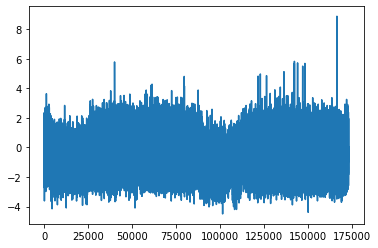

In [6]:
plt.plot(y,x)
#plt.xticks(np.arange(0,731,30)
plt.show()

# Checking the Imbalance in the Data

In [7]:
#Check for imbalance in data
false = datainput[datainput['Class'] == 1]
true = datainput[datainput['Class'] == 0]
n = len(false)/float(len(true))
print(n)
print('False Detection Cases: {}'.format(len(datainput[datainput['Class'] == 1])))
print('True Detection Cases: {}'.format(len(datainput[datainput['Class'] == 0])),"\n")

0.0017304750013189597
False Detection Cases: 492
True Detection Cases: 284315 



# Details of Transaction Types

In [8]:
#False Detection Cases
print("False Detection Cases")
print("----------------------")
print(false.Amount.describe(),"\n")

#True Detection Cases
print("True Detection Cases")
print("----------------------")
print(true.Amount.describe(),"\n")

False Detection Cases
----------------------
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64 

True Detection Cases
----------------------
count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64 



# Separating features and Label

In [9]:
#separating features(X) and label(y)
# Select all columns except the last for all rows
X = datainput[['Time','V1','V5','V11',"V15","V20","V25","Amount"]]
# Select the last column of all rows
Y = datainput.iloc[:, -1].values

print(X.shape)
print(Y.shape)

(284807, 8)
(284807,)


# Train the Model

In [10]:
from sklearn.model_selection import train_test_split
#train_test_split method
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

# Applying Decision Tree Classification

In [11]:
from sklearn import metrics

# Finding Evaluation Parameters

In [12]:
#DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(max_depth=4)
classifier.fit(X_train,Y_train)
predicted=classifier.predict(X_test)
print("\npredicted values :\n",predicted)

#Accuracy
DT = metrics.accuracy_score(Y_test, predicted) * 100
print("\nThe accuracy score using the Decision Tree Classifier : ",DT)


predicted values :
 [0 0 0 ... 0 0 0]

The accuracy score using the Decision Tree Classifier :  99.89993328885924


In [13]:
test = pd.DataFrame()
test['Time'] = [(input("Time - "))]
test['V1'] = [float(input("V1 - "))]
test['V5'] = [float(input("V5 - "))]
test['V11'] = [float(input("V11 - "))]
test['V15'] = [float(input("V15 - "))]
test['V20'] = [float(input("V20 - "))]
test['V25'] = [float(input("V25 - "))]
test['Amount'] = [float(input("Amount - "))]
a = (classifier.predict(test))
if a == [0]:
    print("Transaction is safe")
elif a == [1]:
    print("Transaction is unsafe")

Time - 123
V1 - 1.20561
V5 - 2.061551
V11 - 3.313213
V15 - 4.321321
V20 - 525.10
V25 - 0.2513
Amount - 50000
Transaction is safe


In [14]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# #Accuracy
DT = metrics.accuracy_score(Y_test, predicted) * 100
print("\nThe accuracy score using the DecisionTreeClassifier : ",DT)
#
# #Precision
print('precision')
# Precision = TP / (TP + FP) (Where TP = True Positive, TN = True Negative, FP = False Positive, FN = False Negative).
precision = precision_score(Y_test, predicted, pos_label=1)
print(precision_score(Y_test, predicted, pos_label=1))

#Recall
print('recall')
# Recall = TP / (TP + FN)
recall = recall_score(Y_test, predicted, pos_label=1)
print(recall_score(Y_test, predicted, pos_label=1))

#f1-score
print('f-Score')
# F - scores are a statistical method for determining accuracy accounting for both precision and recall.
fscore = f1_score(Y_test, predicted, pos_label=1)
print(f1_score(Y_test, predicted, pos_label=1))


The accuracy score using the DecisionTreeClassifier :  99.89993328885924
precision
0.8035714285714286
recall
0.4945054945054945
f-Score
0.6122448979591837


# Confusion Matrix


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

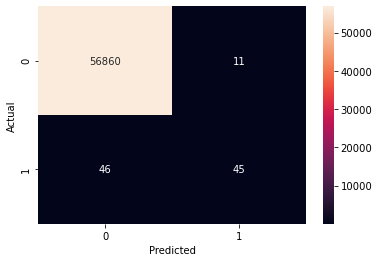

In [15]:
import seaborn as sns
df = pd.DataFrame()

# Create new columns within dataframe
df['Actual'] = Y_test
df['Predicted'] = predicted

# Use pd.crosstab to count the frequency of the classes in actual and predicted
freq = pd.crosstab(df.Actual,df.Predicted)

# Use sns.heatmap to plot the heatmap
sns.heatmap(freq,annot=True,fmt="d")